In [8]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd
from pprint import pprint
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import StratifiedKFold
from scipy import stats
import numpy as np
from sklearn import linear_model, svm
import re
from sklearn.metrics import roc_curve, auc,f1_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
#s = "../braindata/data_1_mor_select_100.csv"
import os          
from sklearn import linear_model, svm
from sklearn.ensemble import ExtraTreesClassifier

os.getcwd()
os.chdir('/Users/yunwang/Documents/research/Jiook_AD/papers/idp_jiook_local/braindata')
dd =pd.read_csv("data_1_mor.csv",header=0)
data=np.array(dd)
#print(data.shape)
idx_IN_columns = np.append(np.array([3,4]),np.array(range(11,data.shape[1])))
X=data[:,idx_IN_columns]
#features=data[:,11:data.shape[1]]
#features = features.transpose()
X = stats.zscore(X)
#print(features.shape)
y=data[:,6]
#5: ad-smi / 6:mci-smi / 7:adonly-smi / 8:ad-mci / 9:adonly-mci / 10:adonly - adwithsmallvv

ind_num=np.isnan(y)
# print(ind_num.shape)


y_no_nan = y[~ind_num]

X_no_nan = X[~ind_num,:]

       # print(y.shape)

y=y_no_nan
X=X_no_nan
feature_num_all=[]
lr_all_feature=[]
svm_all_feature=[]
lr_fls_feature=[]
svm_fls_feature=[]

#X=X.reshape(X.size,1)
#X=X.astype(np.float64,copy=False)
np.isnan(X).any()
#feature_num=features.shape[1]
X[np.isnan(X)] = np.median(X[~np.isnan(X)])
clf = ExtraTreesClassifier(n_estimators=50,
                              random_state=0)
clf = clf.fit(X, y)
importances = clf.feature_importances_
importances
indices = np.argsort(importances)[::-1]
#print("Feature ranking:")

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
n_features = [20,40,50,70,80,100,200,300,400,500,600,700,800,900]
n_features.sort()

for i in n_features:
#     #print(i)
    
#     #lsvc = LinearSVC(C=J[i],penalty="l1", dual=True).fit(X, y)
#     #model = SelectFromModel(lsvc, prefit=True)
#     #features = model.transform(X)
#     clf = ExtraTreesClassifier(n_estimators=250,
#                               random_state=0)
#     clf = clf.fit(X, y)
#     importances = forest.feature_importances_
       
    index=indices[0:i]
    features=X[:,index]
#     clf.feature_importances_ 

#     model = SelectFromModel(clf, threshold=0.6,prefit=True)
#     features = model.transform(X)
#     features.shape               
#     #features=features.reshape(features.size,1)
#     #features=features.astype(np.float64,copy=false)
#     np.isnan(features).any()
    feature_num=features.shape[1]
    print(feature_num)
    
  
    lr_all_accs = []
    lr_all_scores = []
    lr_f1s = []
    svm_all_accs = []
    svm_all_scores = []
    svm_f1s = []
    base_labels = []
    for runs in range(2):
        lr_accuracies = []
        lr_scores = []
        svm_accuracies = []
        svm_scores = []
        strat_labels = []
        
        logistic = linear_model.LogisticRegression(C=1e5)
        rbf = svm.SVC(C=10,kernel='linear',gamma=0.01)

        skf = StratifiedKFold(n_splits=10)
        for train_index, test_index in skf.split(features, y):
                    train_data, test_data = features[train_index], features[test_index]
                    train_labels, test_labels = y[train_index], y[test_index]

                    strat_labels = np.append(strat_labels, test_labels)

                    log = logistic.fit(train_data, train_labels)
                    log_prob = log.decision_function(test_data)
                    log_acc = log.score(test_data, test_labels)

                    #f1 calculation
                    y_pred = logistic.predict(test_data)
                    log_f1 = f1_score(test_labels, y_pred)

                    lr_accuracies = np.append(lr_accuracies, log_acc)
                    lr_scores = np.append(lr_scores, log_prob)
                    lr_f1s = np.append(lr_f1s, log_f1)
                    #print('Logistic Regression Accuracy: %f' % log_acc)

                    rbf = rbf.fit(train_data, train_labels)
                    svm_acc = rbf.score(test_data, test_labels)
                    svm_prob = rbf.decision_function(test_data)

                    #f1 calculation
                    y_pred = rbf.predict(test_data)
                    svm_f1 = f1_score(test_labels, y_pred)
                    #print('SVM Accuracy: %f' % svm_acc)
                    svm_accuracies = np.append(svm_accuracies, svm_acc)
                    svm_scores = np.append(svm_scores, svm_prob)
                    svm_f1s = np.append(svm_f1s, svm_f1)

                    base_labels = np.append(base_labels, strat_labels)
                    lr_all_scores = np.append(lr_all_scores, lr_scores)
                    lr_fold_avg = np.mean(lr_accuracies)
                    lr_all_accs = np.append(lr_all_accs, lr_fold_avg)
                    svm_all_scores = np.append(svm_all_scores, svm_scores)
                    svm_fold_avg = np.mean(svm_accuracies)
                    svm_all_accs = np.append(svm_all_accs, svm_fold_avg)
                    #print('Logistic Regression Accuracy: %f' % log_acc_avg)
                    #print('SVM Regression Accuracy: %f' % svm_acc_avg)
    feature_num_all=np.append(feature_num_all,feature_num)
    print(np.mean(lr_all_accs))
    print(np.mean(svm_all_accs))      
    lr_all_feature=np.append(lr_all_feature,np.mean(lr_all_accs))
    svm_all_feature=np.append(svm_all_feature,np.mean(svm_all_accs))
    lr_fls_feature=np.append(lr_fls_feature,np.mean(lr_f1s))
    svm_fls_feature=np.append(svm_fls_feature,np.mean(svm_f1s))

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2247: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


20
0.696758617925
0.638504729838
40
0.657557118807
0.70680667789
50
0.636332852333
0.665670514671
70
0.635633637967
0.673697851531
80
0.606417748918
0.682684423601
100
0.650415383999
0.687285313452
200
0.634422358506
0.754098124098
300
0.672038680455
0.731861271445
400
0.689775092192
0.737530222864
500
0.658802429052
0.726169111752
600
0.571298100048
0.670561527978
700
0.508395101812
0.606452781786
800
0.54140339907
0.649908249158
900
0.522144580728
0.573896344396


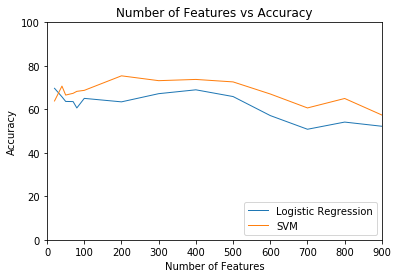

[ 0.875       0.54545455  0.66666667  0.46153846  0.36363636  0.66666667
  0.36363636  0.61538462  0.76923077  0.76923077  0.875       0.54545455
  0.66666667  0.46153846  0.36363636  0.66666667  0.36363636  0.61538462
  0.76923077  0.76923077]
LR accuracy Avg: 0.6200996501294121
LR accuracy Standard Deviation: 0.05903624020330872
LR f1s Avg : 0.6468483897055325
LR f1s Standard Deviation: 0.21039645117412664
SVM Avg: 0.6789376531757485
SVM Standard Deviation: 0.10478961464470987
SVM f1s Avg : 0.7233434037950844
SVM f1s Standard Deviation: 0.0514449270201255


In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot( (feature_num_all), lr_all_feature*100, lw=1, label='Logistic Regression')
plt.plot( (feature_num_all), svm_all_feature*100, lw=1, label='SVM')
plt.xlim([0, 900])
plt.ylim([0, 100])
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs Accuracy')
plt.legend(loc="lower right")
plt.savefig('MCI_SMI_Mor.eps')
plt.show()

svm_f1s=svm_f1s[np.nonzero(svm_f1s)]
print(svm_f1s)

print("LR accuracy Avg: {}".format(np.mean(lr_all_feature)))
print("LR accuracy Standard Deviation: {}".format(np.std(lr_all_feature)))

print("LR f1s Avg : {}".format(np.mean( lr_fls_feature)))
print("LR f1s Standard Deviation: {}".format(np.std(lr_f1s)))

print("SVM Avg: {}".format(np.mean(svm_all_feature)))
print("SVM Standard Deviation: {}".format(np.std(svm_all_accs)))

print("SVM f1s Avg : {}".format(np.mean( svm_fls_feature )))
print("SVM f1s Standard Deviation: {}".format(np.std(svm_fls_feature)))
#print(lr_all_accs)

In [47]:
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
clf = clf.fit(X, y)
importances = clf.feature_importances_
importances
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

(21,)

In [12]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd
from pprint import pprint
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import StratifiedKFold
from scipy import stats
import numpy as np
from sklearn import linear_model, svm
import re
from sklearn.metrics import roc_curve, auc,f1_score
from sklearn.pipeline import Pipeline


(146, 71)

In [5]:
X.shape

(146, 950)

In [51]:
X.shape

(98, 102)

In [19]:
os.getcwd()
os.chdir('../idp_jiook_local/braindata')

FileNotFoundError: [Errno 2] No such file or directory: '../idp_jiook_local/braindata'

In [24]:
lr_all_accs.shape

(100,)

In [6]:
np.isnan(features)

array([], shape=(98, 0), dtype=bool)

In [6]:
print(range(10))

range(0, 10)


In [14]:
np.log(20000)

9.9034875525361272